In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [11]:
raw_losses_loaded = np.load('foobarbaz4_raw_losses.npy')

In [14]:
def plot_loss(ax,
              x,
              y,
              label,
              num_epochs,
              num_batches_per_epoch,
              color,
              line_type,
              line_width):
    line_style = f"{color}{line_type}"

    # Given contastive-loss with cosine-similarity the expected range
    # of losses is 0 - 1
    ax.set_ylim(0.0001, 1.0)

    ax.plot(x, y, line_style, alpha=0.3,
            label=label, linewidth=line_width)

    # Add epoch markers
    for epoch in range(num_epochs):
        batch_idx = epoch * num_batches_per_epoch
        if batch_idx < len(y):
            ax.scatter(batch_idx, y[batch_idx],
                       color=color, alpha=0.5, marker='o')

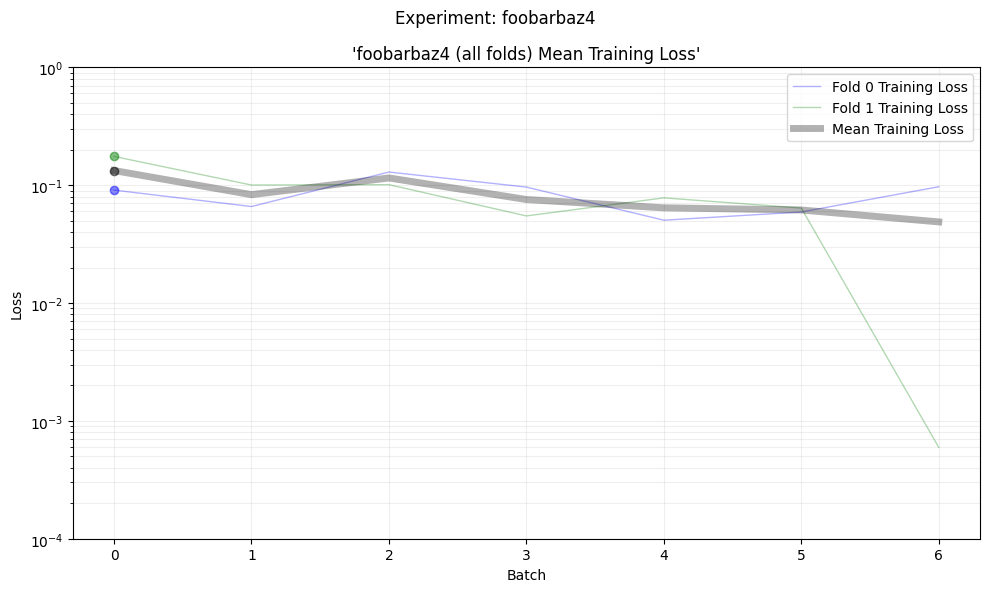

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
# Given contastive-loss with cosine-similarity the expected range
# of losses is 0 - 1
ax.set_ylim(0.0001, 1.0)

colors = ['b', 'g', 'r', 'c', 'm', 'y']
line_types = ['-', '--', '-.', ':']

# Plot each fold
# Save min length found for calculated the means
min_len = float('inf')
for i, fold_losses in enumerate(raw_losses_loaded):
    # Line style
    color = colors[i % len(colors)]
    line_type = line_types[(i // len(line_types)) %
                           len(line_types)]
    label = f'Fold {i} Training Loss'
    # Plot loss line
    batch_numbers = np.arange(len(fold_losses))

    plot_loss(ax,
              batch_numbers,
              fold_losses,
              label,
              1,
              7,
              color,
              line_type,
              1.0)

    # Updatae min length
    min_len = min(min_len, len(fold_losses))

# Calculate and plot mean line up to minimum length
truncated_losses = [losses[:min_len]
                    for losses in raw_losses_loaded]
means = np.mean(np.array(truncated_losses), axis=0)
plot_loss(ax,
          np.arange(min_len),
          means,
          'Mean Training Loss',
          1,
          7,
          'k',
          '-',
          5.0)

# Setup axes and labels
ax.set_xlabel('Batch')
ax.set_ylabel('Loss')
# Adapted from:
# https://stackoverflow.com/a/27496811
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.grid(True)
plt.title("'foobarbaz4 (all folds) Mean Training Loss'")
plt.suptitle("Experiment: foobarbaz4")
plt.legend()
plt.yscale('log')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.tight_layout()